# Geolocalisation Challenge

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import os
import sys

In [2]:
os.chdir('..') ; sys.path.append(os.getcwd())

print(os.getcwd())

/cluster/storage/vcharvet/workspace/pythonProjects/geoloc-challenge


### Building features

In [3]:
from utils.features_builder import Builder

In [4]:
train_path = 'data/Train/train_dataset.csv'
train_data = pd.read_csv(train_path, sep=',')

train_data.head()

,Unnamed: 0,Unnamed: 0.1,messageid,latitude,longitude,did,did_hex,time_msg,time_ux,time_ux_client,...,radius,datepart,seqnumber,dtid,nseq,rssi,bsid_hex,bsid,snr,freq
0,1,12406538,5b216b5ae541cd3845b8c2c5,48.984978,2.361960,5132655,4E516F,2018-06-13 19:07:06,1528916826000,1.528917e+12,...,NaN,2018-06-13,835,5491a93b9336908c3b1b4c70,0,-134,2035,8245,10.890000,868192913
1,2,9069667,5addfec9e541cd123f0bd3f5,48.837357,2.483158,5140851,4E7173,2018-04-23 15:42:01,1524498121000,1.524498e+12,...,NaN,2018-04-23,103,5491a93b9336908c3b1b4c70,0,-104,3ED2,16082,47.549999,868134621
2,3,7404394,5a74bdcf12f14352d21e92a9,48.862305,2.366602,5136312,4E5FB8,2018-02-02 19:36:47,1517600207000,1.517600e+12,...,NaN,2018-02-02,570,5491a93b9336908c3b1b4c70,0,-106,DEA,3562,45.070000,868139828
3,5,9104930,5b06b5e1e541cd05fd935cda,48.978531,2.387568,5134613,4E5915,2018-05-24 12:53:53,1527166433000,1.527166e+12,...,NaN,2018-05-24,1174,5491a93b9336908c3b1b4c70,0,-139,37C8,14280,7.690000,868051002
4,6,5185493,5ae5b900cf554f6aa996a3da,48.876232,2.380044,5141682,4E74B2,2018-04-29 12:22:24,1525004544000,1.525005e+12,...,NaN,2018-04-29,629,5491a93b9336908c3b1b4c70,0,-124,6CF,1743,17.940001,868109215


In [5]:
clt_cols = ['dtid', 'time_ux_client', 'motion', 'speed', 'data_type', 'radius', 'seqnumber']

bs_cols = ['nseq', 'rssi', 'snr', 'freq', 'time_ux']

builder = Builder('messageid', 'bsid', clt_cols, bs_cols, 500)

builder.client_features(train_data)

builder.gb_bs_features(train_data)


Shape of df_groupby: (10024673, 5)


nseq  rssi        snr       freq  \
messageid                bsid                                      
5a497a24cf554f30e846c069 1796      0  -124  27.570000  868161790   
                         1859      0  -134  17.559999  868162324   
                         2846      0  -122  29.330000  868162333   
                         3378      0  -137  14.450000  868161847   
                         3414      0  -115  36.209999  868161902   
                         3570      0  -133  18.420000  868161463   
                         3581      0  -109  42.459999  868161386   
                         4058      0  -116  34.910000  868161622   
                         4078      0  -138  13.580000  868162679   
                         8245      0  -121  29.790001  868161527   
                         8437      0  -125  26.320000  868161778   
5a497a4ce541cd714d45b1c5 1476      0  -100  51.110001  868141945   
                         1796      0  -140  11.390000  868142058   
                         3563      0  -133  17.959999  868141942   
                         3578      0  -103  47.700001  868141980   
                         8472      0  -115  36.540001  868142269   
                         14280     0  -139  12.020000  868141870   
5a497a4dcf554f30e8472041 2768      0  -141  10.580000  868105359   
                         3357      0  -131  20.450001  868104524   
                         3412      0  -124  27.570000  868104900   
                         3545      0  -116  35.299999  868104520   
                         3565      0  -126  25.129999  868104935   
                         8475      0  -130  20.650000  868104421   
5a497aafcf554f30e847cc61 2605      0  -128  23.410000  868053645   
                         2707      0  -114  37.389999  868052773   
                         2846      0  -107  44.380001  868053017   
                         3025      0  -107  44.349998  868052874   
                         3526      0  -118  32.810001  868052650   
                         3581      0  -113  38.180000  868052071   
                         4058      0  -119  32.540001  868052304   
...                              ...   ...        ...        ...   
5b45481ccf554f42c39de904 3578      0  -131  14.090000  868177549   
                         3579      0  -111  23.420000  868177472   
                         4058      0  -126   8.840000  868177354   
                         4059      0  -130  11.210000  868177296   
                         4129      0  -121  11.980000  868177459   
                         4993      0  -126  17.309999  868177289   
                         7248      0  -125  20.150000  868178021   
                         8364      0  -120  23.740000  868177590   
                         8446      0  -127  18.770000  868177464   
                         8472      0  -132  10.890000  868177666   
                         10151     0  -132  15.290000  868177126   
                         10162     0  -126  18.299999  868177138   
                         10942     0  -119  22.430000  868177309   
                         27486     0  -123  22.320000  868177038   
5b454825cf554f42c39e0605 1859      0  -121  15.260000  868066920   
                         2605      0  -134   9.940000  868067690   
                         2846      0  -134   9.620000  868066718   
                         3547      0  -131   7.280000  868066434   
                         3570      0  -128  15.910000  868066129   
                         3581      0   -97  19.709999  868065960   
                         4058      0  -123  14.720000  868066165   
                         8370      0  -131  15.140000  868066246   
                         28233     0  -143   6.830000  868065815   
5b45482ae541cd394f380deb 1872      0  -132  14.520000  868186986   
                         1878      0  -123  19.110001  868187237   
                         2790      0  -128  14.870000  868187374   
                    

In [6]:
df_bs_features = builder.fast_bs_features(30)

df_features = pd.concat([builder.df_features_, df_bs_features], axis=1)

df_features.head()

0.052% of database parsed
0.104% of database parsed
0.157% of database parsed
0.209% of database parsed
0.261% of database parsed
0.313% of database parsed
0.366% of database parsed
0.418% of database parsed
0.470% of database parsed
0.522% of database parsed
0.574% of database parsed
0.627% of database parsed
0.679% of database parsed
0.731% of database parsed
0.783% of database parsed
0.835% of database parsed
0.888% of database parsed
0.940% of database parsed
0.992% of database parsed
1.044% of database parsed
1.097% of database parsed
1.149% of database parsed
1.201% of database parsed
1.253% of database parsed
1.305% of database parsed
1.358% of database parsed
1.410% of database parsed
1.462% of database parsed
1.514% of database parsed
1.566% of database parsed
1.619% of database parsed
1.671% of database parsed
1.723% of database parsed
1.775% of database parsed
1.828% of database parsed
1.880% of database parsed
1.932% of database parsed
1.984% of database parsed
2.036% of da

In [ ]:
df_features.head()

In [ ]:
# reindex df_features for future merge
df_features.set_index('messageid', inplace=True)

In [6]:
# checking consistency of features
df_features.shape, train_labels.shape

((2298059, 8), (2298059, 2))

In [ ]:
train_labels = train_data[['messageid', ' latitude', 'longitude']] \
    .groupby('messageid', as_index=True).first()
    
Xy = df_features.merge(train_labels)

Xy.head()

In [ ]:
# free disk space
del df_client_features, df_bs_features, builder
import gc ; gc.collect() ; del  gc

## Feature engineering

This step consists in transforming the features in vectors, ie removing NaN values, transforming columns etc...

Further are described in `feature_exploration.ipynb` notebook as well as there distributions and types

### By column

In [ ]:
# client specific features
# dtid -> one hot encoding , 0% missing values

# motion: bool  when t = 1 else 0  , 21% Nan: input majority (0)
# speed: numeric, 21% NaN, input(0) (corresponds to missing `motion` so it is set to 0)
Xy['motion'] = Xy['motion'].apply(lambda u: 1 if u == 't' else 0)
Xy.fillna({'motion': 0, 'speed': 0}, inplace=True)

# data-type -> one-hot encoding, 0% missing values
dtype_ohe = pd.get_dummies(Xy['data-type'])
Xy.drop('data-type', axis=1, inplace=True)
Xy = pd.concat([Xy, dtype_ohe], axis=1)


# radius, numeric, 82% missing values input median
radius_median = Xy['radius'].median()
Xy.fillna({'radius': radius_median}, inplace=True)

# seqnumber, numeric, 0% NaN, nothing to do


In [ ]:
# creating column `delay` : (time_ux_bsid - time_ux_client)
time_columns = ['time_ux{}'.format(bsid) for bsid in bsids]

for time_column in time_columns:
    Xy[time_column] = (Xy[time_column] // 1000 - Xy['time_ux_client'] // 1000)

Xy.drop('time_ux_client', axis=1, inplace=True) # useful ? maybe cut in hour

### From HDF5 or Parquet

In [3]:
Xy = pd.read_parquet('data/feature_matrix_train_v0.parquet')

Xy.head()

,dtid,motion,speed,radius,seqnumber,nseq8245,nseq16082,nseq3562,nseq14280,nseq1743,...,time_ux1253,time_ux27386,time_ux24929,time_ux15085,latitude,longitude,fast,gps,priv,wifi
5a497a24cf554f30e846c069,5491a93b9336908c3b1b4c70,0,1.0,0.0,283,0.0,0.0,0.0,0.0,0.0,...,1.514765e+09,1.514765e+09,1.514765e+09,1.514765e+09,48.909265,2.310304,0,1,0,0
5a497a4ce541cd714d45b1c5,5491a93b9336908c3b1b4c70,0,1.0,0.0,194,0.0,0.0,0.0,0.0,0.0,...,1.514765e+09,1.514765e+09,1.514765e+09,1.514765e+09,49.009068,2.351928,0,1,0,0
5a497a4dcf554f30e8472041,5491a93b9336908c3b1b4c70,0,0.0,0.0,2598,0.0,0.0,0.0,0.0,0.0,...,1.514765e+09,1.514765e+09,1.514765e+09,1.514765e+09,48.804501,2.427322,0,1,0,0
5a497aafcf554f30e847cc61,5491a93b9336908c3b1b4c70,0,0.0,0.0,2721,0.0,0.0,0.0,0.0,0.0,...,1.514765e+09,1.514765e+09,1.514765e+09,1.514765e+09,48.965332,2.238364,0,1,0,0
5a497adde541cd714d46accb,5491a93b9336908c3b1b4c70,0,1.0,0.0,1898,0.0,0.0,0.0,0.0,0.0,...,1.514765e+09,1.514765e+09,1.514765e+09,1.514765e+09,48.978103,2.320644,0,1,0,0


In [4]:
# features = list(Xy.columns)
# time_columns = [x for x in features if 'time_ux' in x]

# for time_column in time_columns:
#     Xy[time_column] = - Xy[time_column]
# Xy.head()

,dtid,motion,speed,radius,seqnumber,nseq8245,nseq16082,nseq3562,nseq14280,nseq1743,...,time_ux1253,time_ux27386,time_ux24929,time_ux15085,latitude,longitude,fast,gps,priv,wifi
5a497a24cf554f30e846c069,5491a93b9336908c3b1b4c70,0,1.0,0.0,283,0.0,0.0,0.0,0.0,0.0,...,1.514765e+09,1.514765e+09,1.514765e+09,1.514765e+09,48.909265,2.310304,0,1,0,0
5a497a4ce541cd714d45b1c5,5491a93b9336908c3b1b4c70,0,1.0,0.0,194,0.0,0.0,0.0,0.0,0.0,...,1.514765e+09,1.514765e+09,1.514765e+09,1.514765e+09,49.009068,2.351928,0,1,0,0
5a497a4dcf554f30e8472041,5491a93b9336908c3b1b4c70,0,0.0,0.0,2598,0.0,0.0,0.0,0.0,0.0,...,1.514765e+09,1.514765e+09,1.514765e+09,1.514765e+09,48.804501,2.427322,0,1,0,0
5a497aafcf554f30e847cc61,5491a93b9336908c3b1b4c70,0,0.0,0.0,2721,0.0,0.0,0.0,0.0,0.0,...,1.514765e+09,1.514765e+09,1.514765e+09,1.514765e+09,48.965332,2.238364,0,1,0,0
5a497adde541cd714d46accb,5491a93b9336908c3b1b4c70,0,1.0,0.0,1898,0.0,0.0,0.0,0.0,0.0,...,1.514765e+09,1.514765e+09,1.514765e+09,1.514765e+09,48.978103,2.320644,0,1,0,0


In [4]:
dtid_ohe = pd.get_dummies(Xy['dtid'])
Xy.drop('dtid', axis=1, inplace=True)
Xy = pd.concat([Xy, dtid_ohe], axis=1)

Xy.head()

,motion,speed,radius,seqnumber,nseq8245,nseq16082,nseq3562,nseq14280,nseq1743,nseq3558,...,5aa2b2e95005741b7d664456,5aafc3cf9e93a13199a1d3e0,5ad494bd9e93a128c8abfca4,5ad49def3c87894334c6d764,5ad7077f9e93a128c85029d7,5af2bdf49e93a128c8cbbc19,5afbe2c59058c264249ac174,5afd4b7c9058c26424f713c5,5b0ef3125005747bb07f99eb,5b115d0b9058c20630b137df
5a497a24cf554f30e846c069,0,1.0,0.0,283,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5a497a4ce541cd714d45b1c5,0,1.0,0.0,194,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5a497a4dcf554f30e8472041,0,0.0,0.0,2598,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5a497aafcf554f30e847cc61,0,0.0,0.0,2721,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5a497adde541cd714d46accb,0,1.0,0.0,1898,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


There are no missing values in bs specific features, meaning our feature matrix is ready

## Training a model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from utils.evaluation import vincenty_df, vincenty_vec, criterion, plot_error
from geopy.distance import vincenty

In [7]:
features = np.loadtxt('data/features.txt', dtype=str)

In [9]:
X, y = Xy.loc[:, features], Xy.loc[:, ['latitude', 'longitude']]

x_train, x_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, random_state=0)
    
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

/cluster/storage/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/cluster/storage/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.5/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
/cluster/storage/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.5/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [10]:
x_train.shape, y_train.shape

((861810, 816), (861810, 2))

In [11]:
%%time
# lr = LinearRegression(n_jobs=16)
# lr.fit(x_train, y_train)

rf = RandomForestRegressor(n_estimators=500, 
                           max_features='sqrt',
                           max_depth=25,
                           n_jobs=20, verbose=3).fit(x_train, y_train)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.


building tree 1 of 500building tree 2 of 500building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500

building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500


building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=20)]: Done  88 tasks      | elapsed:  1.9min


building tree 108 of 500
building tree 109 of 500
building tree 110 of 500
building tree 111 of 500
building tree 112 of 500
building tree 113 of 500
building tree 114 of 500
building tree 115 of 500
building tree 116 of 500
building tree 117 of 500
building tree 118 of 500
building tree 119 of 500
building tree 120 of 500
building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500


[Parallel(n_jobs=20)]: Done 248 tasks      | elapsed:  5.0min


building tree 269 of 500
building tree 270 of 500
building tree 271 of 500
building tree 272 of 500
building tree 273 of 500
building tree 274 of 500
building tree 275 of 500
building tree 276 of 500
building tree 277 of 500
building tree 278 of 500
building tree 279 of 500
building tree 280 of 500
building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500


[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:  9.9min finished


In [12]:
# pred_lr = pd.DataFrame(lr.predict(x_test), columns=['pred_lat', 'pred_long'])
# pred_lr['messageid'] = x_test.index

pred_rf = pd.DataFrame(rf.predict(x_test), columns=['pred_lat', 'pred_long'])
# pred_rf['messageid'] = x_test.index

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  88 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done 248 tasks      | elapsed:    0.9s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    1.8s finished


In [13]:
df_ytest = pd.DataFrame(y_test, columns=['latitude', 'longitude'])

In [14]:
# print('criterion for logistic regression: {:.3f}'\
#       .format(criterion(pred_lr[['pred_lat', 'pred_long']], df_ytest, True)))
      
print('criterion for random forest: {:.3f}'\
      .format(criterion(pred_rf[['pred_lat', 'pred_long']], df_ytest, True)))

criterion for random forest: 6.784


/cluster/storage/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


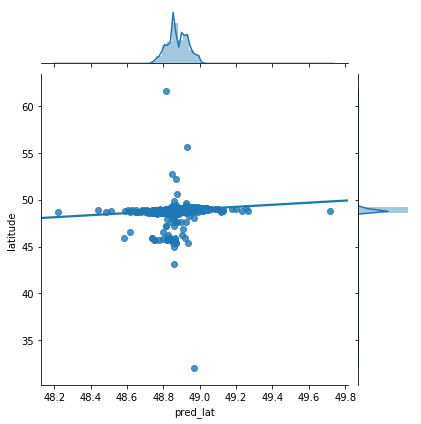

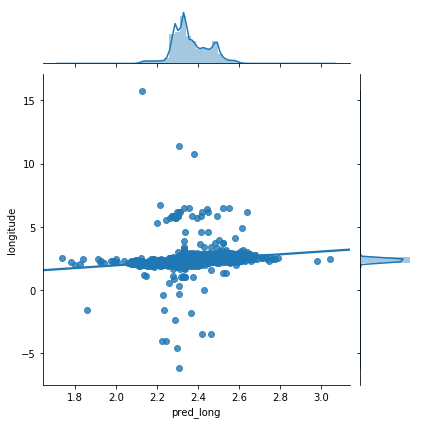

In [16]:
sns.jointplot(pred_rf['pred_lat'], df_ytest['latitude'], kind='reg')
sns.jointplot(pred_rf['pred_long'], df_ytest['longitude'], kind='reg')


In [ ]:
plot_error(x_test, pred_lr['prediction'], True)

/cluster/storage/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.5/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


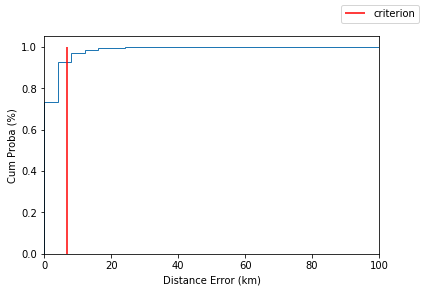

In [17]:
plot_error(df_ytest, pred_rf[['pred_lat', 'pred_long']], True)

Now trying xgboost

In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

xgb_regressor = xgb.XGBRegressor(n_jobs=16)
xgb.fit(x_train, y_train, eval_metric=vincenty_vec)

# Prediction on validation set

In [11]:
X_test = pd.read_parquet('data/feature_matrix_test_v0.parquet')

X_test.head()

,dtid,motion,speed,radius,seqnumber,nseq27486,nseq1988,nseq10151,nseq3414,nseq7456,...,time_ux14623,time_ux14624,time_ux30192,time_ux24925,time_ux27386,time_ux1253,fast,gps,priv,wifi
5a498328e541cd714d549b61,5491a93b9336908c3b1b4c70,0,0.0,0.0,1705,0.0,0.0,0.0,0.0,0.0,...,1.514767e+09,1.514767e+09,1.514767e+09,1.514767e+09,1.514767e+09,1.514767e+09,0,1,0,0
5a49836412f1431c0b27cfb4,5491a93b9336908c3b1b4c70,0,3.0,0.0,945,0.0,0.0,0.0,0.0,0.0,...,1.514767e+09,1.514767e+09,1.514767e+09,1.514767e+09,1.514767e+09,1.514767e+09,0,1,0,0
5a498b4dcf554f30e862fe1c,5491a93b9336908c3b1b4c70,0,1.0,0.0,2488,0.0,0.0,0.0,0.0,0.0,...,1.514769e+09,1.514769e+09,1.514769e+09,1.514769e+09,1.514769e+09,1.514769e+09,0,1,0,0
5a498c8d12f1431c0b3652fb,5491a93b9336908c3b1b4c70,0,0.0,0.0,496,0.0,0.0,0.0,0.0,0.0,...,1.514770e+09,1.514770e+09,1.514770e+09,1.514770e+09,1.514770e+09,1.514770e+09,0,1,0,0
5a498d4de541cd714d647764,5491a93b9336908c3b1b4c70,1,31.0,0.0,2485,0.0,0.0,0.0,0.0,0.0,...,1.514770e+09,1.514770e+09,1.514770e+09,1.514770e+09,1.514770e+09,1.514770e+09,0,1,0,0


In [12]:
dtid_ohe = pd.get_dummies(X_test['dtid'])
X_test.drop('dtid', axis=1, inplace=True)
X_test = pd.concat([X_test, dtid_ohe], axis=1)

X_test.head()

,motion,speed,radius,seqnumber,nseq27486,nseq1988,nseq10151,nseq3414,nseq7456,nseq2251,...,5a8c5aa53c878932a960e07b,5aa2b2e95005741b7d664456,5aafc3cf9e93a13199a1d3e0,5ad494bd9e93a128c8abfca4,5ad49def3c87894334c6d764,5ad7077f9e93a128c85029d7,5afbe2c59058c264249ac174,5afd4b7c9058c26424f713c5,5b0ef3125005747bb07f99eb,5b115d0b9058c20630b137df
5a498328e541cd714d549b61,0,0.0,0.0,1705,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5a49836412f1431c0b27cfb4,0,3.0,0.0,945,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5a498b4dcf554f30e862fe1c,0,1.0,0.0,2488,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5a498c8d12f1431c0b3652fb,0,0.0,0.0,496,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5a498d4de541cd714d647764,1,31.0,0.0,2485,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test_columns = list(X_test.columns)

In [24]:
X_test_scale = StandardScaler().fit_transform(X_test)

test_pred = pd.DataFrame(rf.predict(X_test_scale), columns=['latitude', 'longitude'])
test_pred['messageid'] = X_test.index

/home/infres/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/infres/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  88 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 248 tasks      | elapsed:    0.6s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    1.2s finished


In [26]:
test_pred.head()

,latitude,longitude,messageid
0,48.871437,2.322392,5a498328e541cd714d549b61
1,48.942863,2.148959,5a49836412f1431c0b27cfb4
2,48.885156,2.312151,5a498b4dcf554f30e862fe1c
3,48.947621,2.209542,5a498c8d12f1431c0b3652fb
4,48.850368,2.320488,5a498d4de541cd714d647764


In [29]:
test_pred.values

array([[48.87143719320286, 2.322392326968235, '5a498328e541cd714d549b61'],
       [48.942863412100266, 2.14895883827608, '5a49836412f1431c0b27cfb4'],
       [48.88515605139892, 2.3121508491268785,
        '5a498b4dcf554f30e862fe1c'],
       ...,
       [48.8700135325521, 2.313681279825258, '5b4547c6e541cd394f36c76c'],
       [48.92325424574448, 2.3159628585254017,
        '5b4547e2cf554f42c39d3161'],
       [48.9242799397367, 2.2981900601821406, '5b45481ccf554f42c39de904']],
      dtype=object)

In [31]:
np.savetxt('data/prediction.txt', test_pred[['latitude', 'longitude']])
                        

In [32]:
test_pred.to_csv('data/prediction.csv', sep=',', encoding='utf8')